In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Blur kernel size (change this here)
kernel_size = 11

# Motion blur angle (do not change)
min_angle = 0
max_angle = 180

In [ ]:
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

In [ ]:
# Motion blur generation routines
def create_motion_blur_kernel(size, angle):
  kernel = np.zeros((size, size), dtype=np.float32)
  center = (size - 1) / 2.0

  radian_angle = np.deg2rad(angle)
  dx = np.cos(radian_angle)
  dy = np.sin(radian_angle)
  x1 = int(round(center - dx * center))
  y1 = int(round(center - dy * center))
  x2 = int(round(center + dx * center))
  y2 = int(round(center + dy * center))

  cv2.line(kernel, (x1, y1), (x2, y2), 1.0, thickness=1)

  kernel[kernel < 0] = 0
  kernel_sum = kernel.sum()
  if kernel_sum == 0:
    kernel[int(center), int(center)] = 1.0
  else:
    kernel /= kernel_sum

  return kernel


def add_motion_blur(images, ksize, min_angle, max_angle, seed=123):

    blurred_images = np.zeros_like(images, dtype=np.float32)
    rng = np.random.RandomState(seed)

    for i in range(len(images)):

        image = images[i]

        # Parameters of motion blur kernel
        if ksize % 2 == 0:
            ksize += 1
        angle = rng.uniform(min_angle, max_angle)

        # Create motion blur kernel
        kernel = create_motion_blur_kernel(ksize, angle)

        # Apply kernel
        blurred_img = cv2.filter2D(image, -1, kernel)

        # 5. Clip and store
        blurred_images[i] = np.clip(blurred_img, 0.0, 255.0)

    return blurred_images.astype(np.int16)

In [ ]:
x_train_blurred = add_motion_blur(x_train, kernel_size, min_angle, max_angle)
x_test_blurred = add_motion_blur(x_test, kernel_size, min_angle, max_angle)

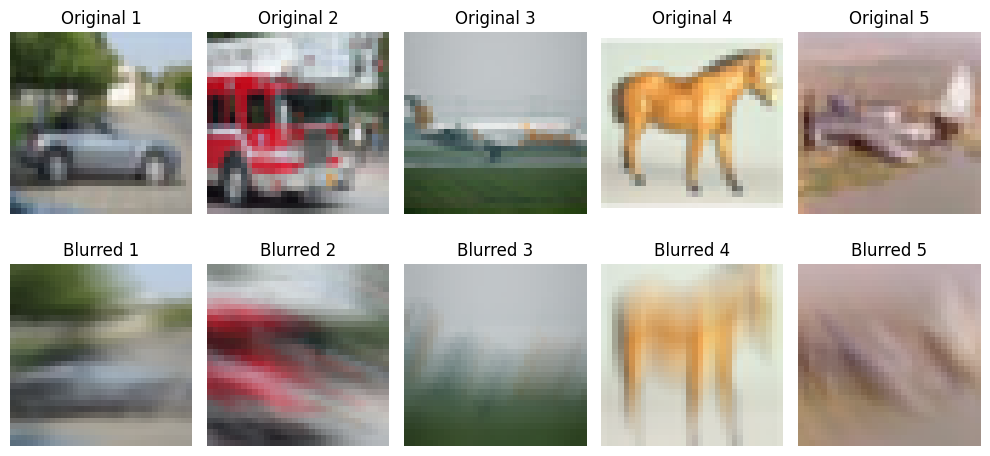

In [ ]:
# Visualize some of the blurred data along with the original data
def visualize_blurring(x_orig, x_blurred, num_examples=5):

  num_examples = min(num_examples, len(x_blurred))
  indices = np.random.choice(len(x_blurred), num_examples, replace=False)
  sample_orig = x_orig[indices]
  sample_blurred = x_blurred[indices]

  plt.figure(figsize=(num_examples * 2, 5))
  for i in range(num_examples):

    ax = plt.subplot(2, num_examples, i + 1)
    plt.imshow(sample_orig[i])
    plt.title(f"Original {i+1}")
    plt.axis("off")

    ax = plt.subplot(2, num_examples, i + 1 + num_examples)
    plt.imshow(sample_blurred[i])
    plt.title(f"Blurred {i+1}")
    plt.axis("off")

  plt.tight_layout()
  plt.show()

# Visualize some of the blurred data
visualize_blurring(x_train, x_train_blurred, num_examples=5)